# Group Project - Proposal

### Group members:
* Audrey Wang 41935289
* Sam Shan 85179604
* Dima Zubkovskii
* Michelle Sui


### Tasks:

* Import data into R
* Clean and wrangle data into a tidy format
* Separate data into training data and test data
* Summarize the training data in tables
    * The number of observations in each class
    * The means of the predictor variables you plan to use in your analysis and 
    * How many rows have missing data
* Visualize the training data
* Further analysis
    * Impact/significance
    * Future questions
* File preparation: HTML, ipynb

# Introdcuton

Text


# Preliminary exploratory data analysis

## Read and import dataset from the web

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [21]:
URL <- "https://raw.githubusercontent.com/audrey-rw5683/dsci-100-2023w2-group-002-2/main/diabetes.csv"
diabetes_data <- read_csv(URL)
head(diabetes_data)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


### Clean and wrangle the data into a tidy format

#### Set seed value

In [33]:
set.seed(123) #do not change the value.

In [34]:
# rename colunms to lowercase
diabetes_with_missing <- rename(diabetes_data,
                 pregnancies =  Pregnancies,
                 glucose = Glucose,
                 blood_pressure = BloodPressure,
                 skin_sickness = SkinThickness,
                 insulin = Insulin,
                 bmi = BMI,
                 diabetes_pedigree_function = DiabetesPedigreeFunction,
                 age = Age,
                 outcome = Outcome)
# we will be working with outcome as a categorical variable, we will convert it to a factor using the function as_factor.
diabetes_with_missing <- diabetes_with_missing |>
    mutate(outcome = as_factor(outcome))

head(diabetes_with_missing)

pregnancies,glucose,blood_pressure,skin_sickness,insulin,bmi,diabetes_pedigree_function,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


#### Deal with missing values


In [36]:
diabetes <- diabetes_with_missing |>
    filter(glucose != 0, blood_pressure != 0, skin_sickness != 0, insulin != 0, bmi != 0, age !=0)
diabetes

pregnancies,glucose,blood_pressure,skin_sickness,insulin,bmi,diabetes_pedigree_function,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
3,78,50,32,88,31.0,0.248,26,1
2,197,70,45,543,30.5,0.158,53,1
1,189,60,23,846,30.1,0.398,59,1
5,166,72,19,175,25.8,0.587,51,1
0,118,84,47,230,45.8,0.551,31,1
1,103,30,38,83,43.3,0.183,33,0
1,115,70,30,96,34.6,0.529,32,1


### Slipt the data
* We will use 80% of the data for training and 20% for testing.

In [29]:
diabetes_split <- initial_split(diabetes, prop = 0.8, strata = outcome)  
diabetes_train <- training(diabetes_split)   
diabetes_test <- testing(diabetes_split)
glimpse(diabetes_train)
glimpse(diabetes_test)

Rows: 614
Columns: 9
$ pregnancies                <dbl> 5, 10, 4, 8, 1, 5, 3, 4, 3, 7, 7, 1, 1, 1, …
$ glucose                    <dbl> 116, 115, 110, 99, 97, 117, 88, 103, 180, 1…
$ blood_pressure             <dbl> 74, 0, 92, 84, 66, 92, 58, 60, 64, 84, 64, …
$ skin_sickness              <dbl> 0, 0, 0, 0, 15, 0, 11, 33, 25, 0, 0, 0, 11,…
$ insulin                    <dbl> 0, 0, 0, 0, 140, 0, 54, 192, 70, 0, 0, 0, 8…
$ bmi                        <dbl> 25.6, 35.3, 37.6, 35.4, 23.2, 34.1, 24.8, 2…
$ diabetes_pedigree_function <dbl> 0.201, 0.134, 0.191, 0.388, 0.487, 0.337, 0…
$ age                        <dbl> 30, 29, 30, 50, 22, 38, 22, 33, 26, 37, 40,…
$ outcome                    <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
Rows: 154
Columns: 9
$ pregnancies                <dbl> 6, 1, 1, 10, 1, 3, 13, 5, 6, 10, 11, 9, 2, …
$ glucose                    <dbl> 148, 85, 89, 139, 103, 126, 145, 109, 92, 1…
$ blood_pressure             <dbl> 72, 66, 66, 80, 30, 88, 82, 75, 92, 78, 76,

### Data description

* pregnancies: the number of pregnancies
* glucose: the plasma glucose concentration
* blood_pressure: diastolic blood pressure in mm/Hg
* skin_sickness: triceps skinfold thickness in mm
* insulin: insulin in U/mL
* bmi: the body mass index in kg/m2
* diabetes_pedigree_function: the function which scores likelihood of diabetes based on family history
* age: the age of the person
* outcome: if the patient had a diabetes or not (1 = yes, 0 = no)

#### Check the categories in the outcome column

In [28]:
diabetes_outcomes <- diabetes_train |>
                    group_by(outcome) |>
                    summarize(count = n())

diabetes_outcomes

outcome,count
<dbl>,<int>
0,400
1,214


In [5]:
diabetes_observations <- diabetes_train |>
                    nrow()

diabetes_observations

[1] 614

In [6]:
# dont know how to do

# diabetes_missing_data <- diabetes_train |>
#                     group_by(Outcome) |>
#                     summarize(Outcome = n())

# diabetes_missing_data

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


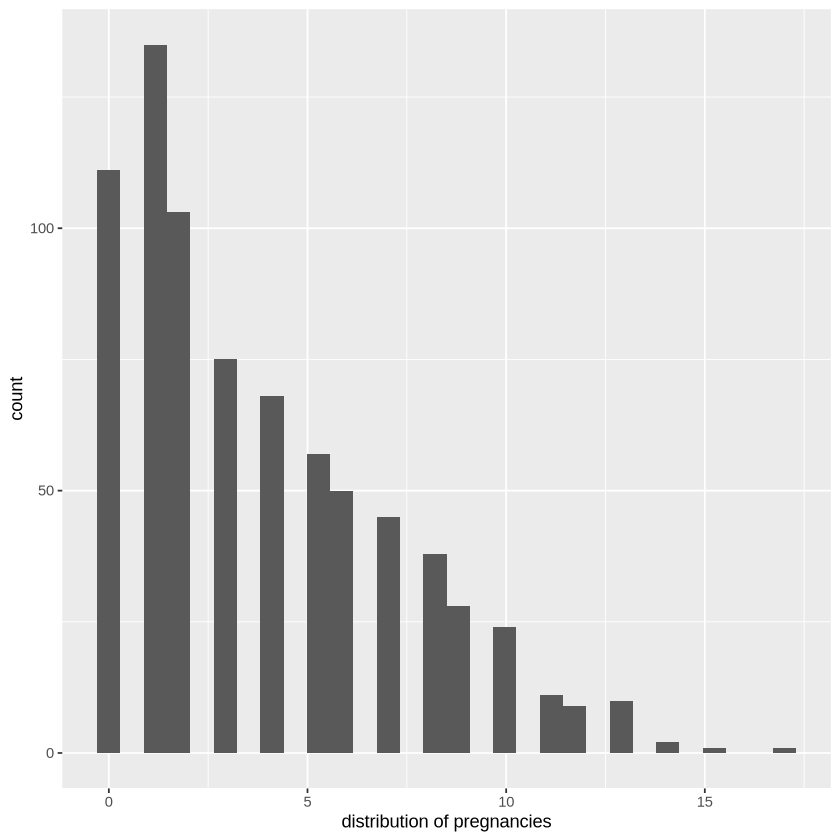

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


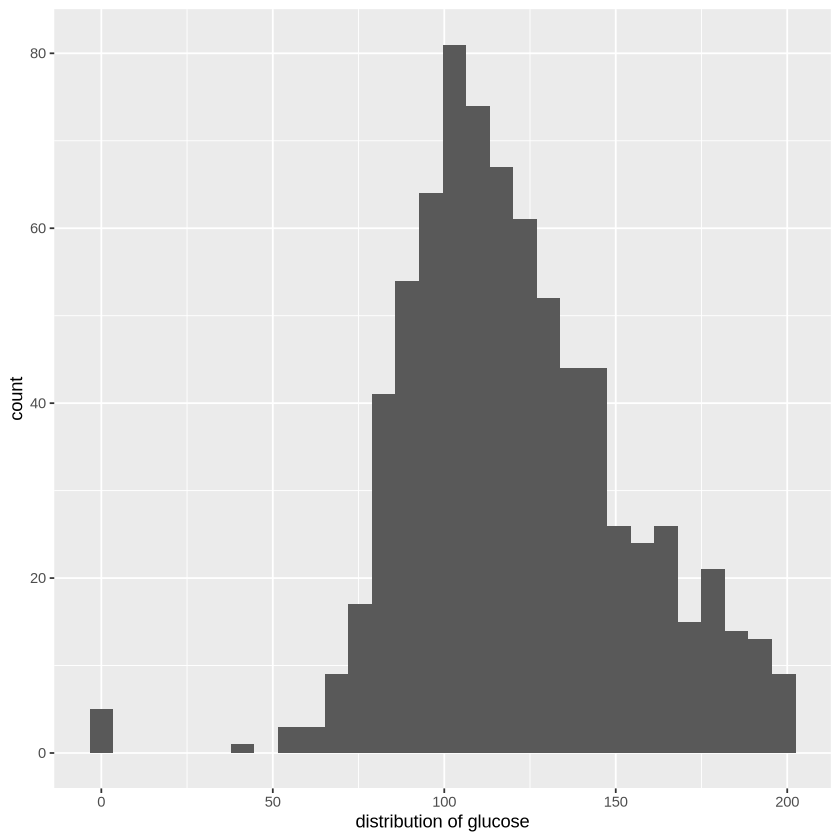

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


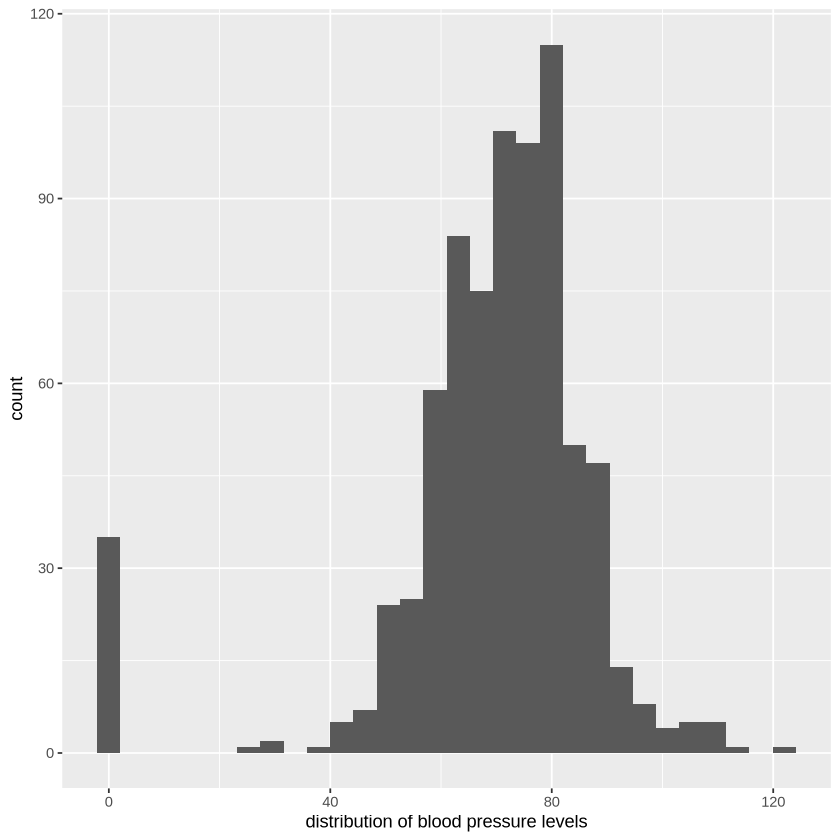

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


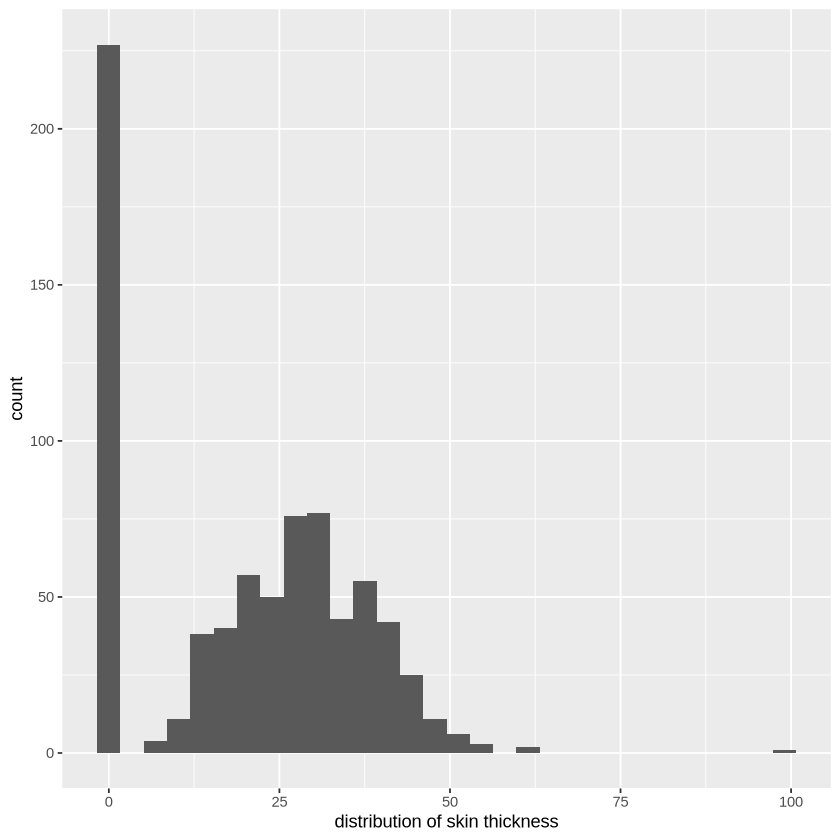

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


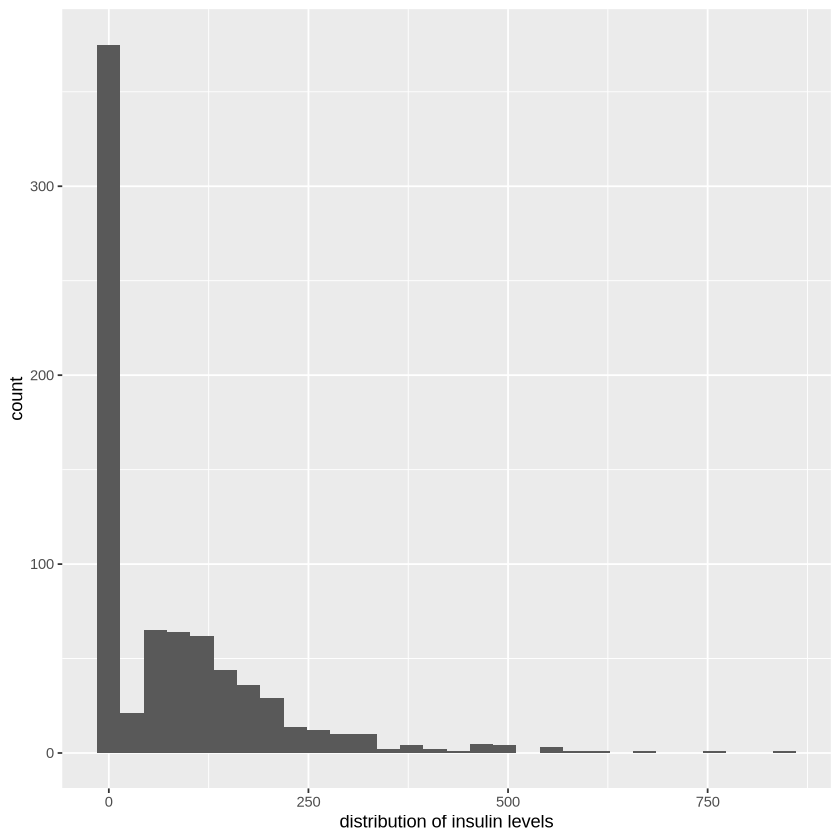

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


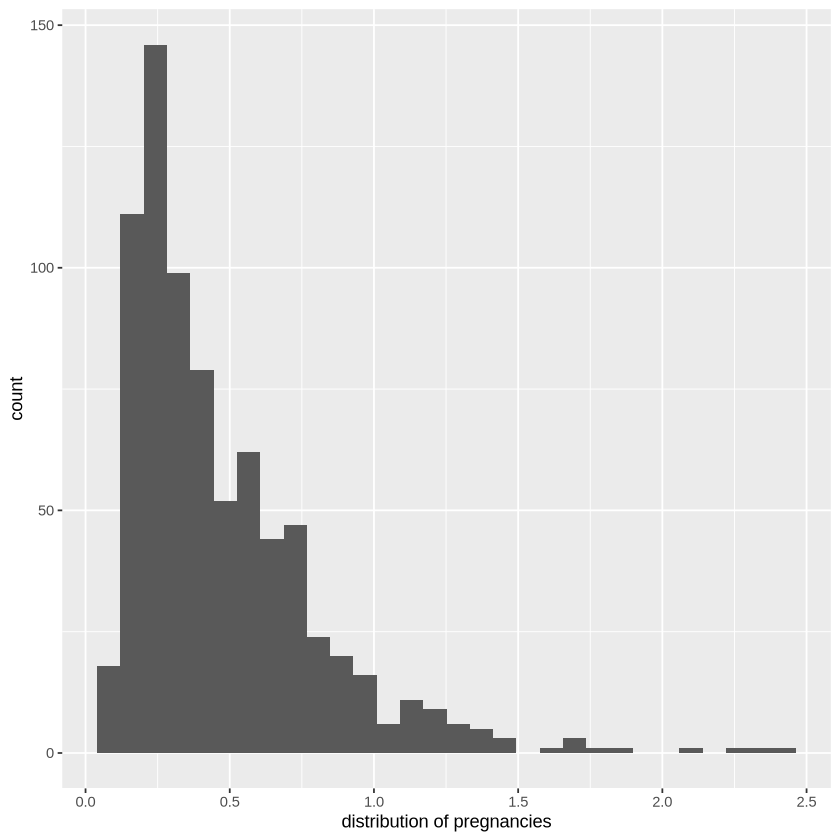

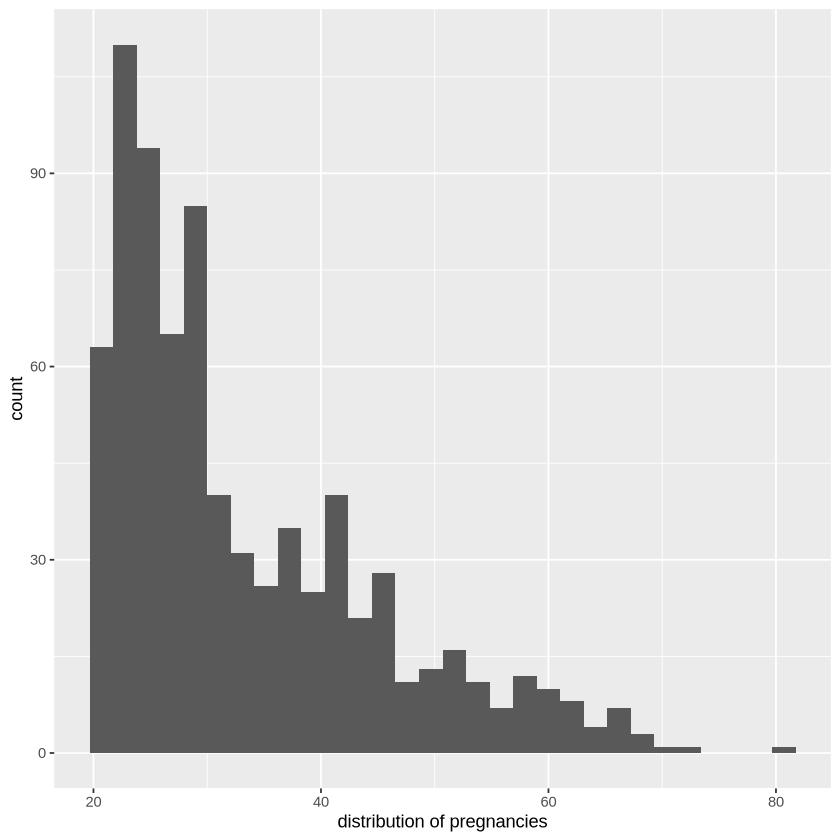

In [7]:
diabetes_pregancies_plot <- diabetes |>
   ggplot(aes(x = Pregnancies)) + 
   geom_histogram() +
   xlab("distribution of pregnancies")

diabetes_glucose_plot <- diabetes |>
   ggplot(aes(x = Glucose)) + 
   geom_histogram() +
   xlab("distribution of glucose") 

diabetes_bloodpressure_plot <- diabetes |>
   ggplot(aes(x = BloodPressure)) + 
   geom_histogram() +
   xlab("distribution of blood pressure levels")

diabetes_skinthickness_plot <- diabetes |>
   ggplot(aes(x = SkinThickness)) + 
   geom_histogram() +
   xlab("distribution of skin thickness") 

diabetes_insulin_plot <- diabetes |>
   ggplot(aes(x = Insulin)) + 
   geom_histogram() +
   xlab("distribution of insulin levels") 

diabetes_predigrees_plot <- diabetes |>
   ggplot(aes(x = DiabetesPedigreeFunction)) + 
   geom_histogram() +
   xlab("distribution of pregnancies") 

diabetes_age_plot <- diabetes |>
   ggplot(aes(x = Age)) + 
   geom_histogram() +
   xlab("distribution of pregnancies")


#diabetes_pregancies_plot
#diabetes_glucose_plot
#diabetes_bloodpressure_plot
#diabetes_skinthickness_plot
#diabetes_insulin_plot
#diabetes_predigrees_plot
#diabetes_age_plot